## Prédire si un patient est atteint ou non d'une maladie cardio vasculaie
---

Projet réalisé dans le but d'apprendre à manipuler la régression linéaire et d'écrire ma propre classe dédiée à la manipulation de la régression logistique. Le modèle et les données qui en découlent sont calculés avec statsmodels.

Source des données : https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754128-decouvrez-le-jeu-de-donnees-des-maladies-cardio-vasculaires

Mon package contenant ma classe LogReg: https://github.com/nicodesh/ModelStats

A propos de la régression logistique :

- Régression logistique appliquée à un cas d'ophtalmologie https://www.em-consulte.com/en/article/842576
- Coube ROC : https://www.em-consulte.com/rmr/article/144229
- Régression logistique en Python (sklearn / statsmodels) : https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- Présentation universitaire sur la régression logistique : https://perso.univ-rennes1.fr/valerie.monbet/ExposesM2/2013/La%20re%CC%81gression%20logistique.pdf

## Import des librairies et de ma classe LogReg

In [1]:
import pandas as pd
import numpy as np

from modelstats import LogReg

## Import des données et affichage du jeu de données

In [2]:
df = pd.read_csv("data/maladies-cardio-vasculaires.txt", sep=";")
df.drop('ind', axis=1, inplace=True)
df['famhist'] = df['famhist'].apply(lambda x: 1 if x == 'Present' else 0)
df.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,1,69,30.11,0.00,53,1


## Définitions

- sbp : tension artérielle systolique
- tobacco : tabac cumulé (en kg)
- ldl : cholestérol de lipoprotéines de faible densité
- adiposity : adiposité
- famhist : antécédents familiaux
- typea : comportement type A
- obesity : obésité
- alcohol : consommation courante d'alcool
- age : âge au moment de l'attaque cardiaque
- chd : maladie coronarienne.

## Préparation de la donnée

In [3]:
lr1_data = df[['age', 'chd']].copy()

## Création de l'instance de régression logistique

In [4]:
lr1 = LogReg(lr1_data, threshold=0.5, the_class=10)

## Plot des points, de la probabilité par classe et de la régression

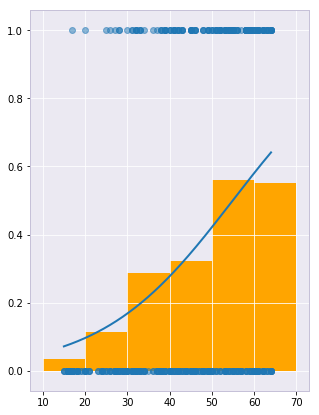

In [5]:
lr1.plot()

## Informations principales

In [6]:
lr1.infos()
lr1.model.summary()

2 parameters (including the intercept)

B1:
Coeff: -3.521710338529013
OR: 0.029548853381806534
P-Value: 2.5612150244813817e-17

B2:
Coeff: 0.06410803282473575
OR: 1.0662075779562277
P-Value: 5.757918479304603e-14



,y = 1,y = 0,Total
Predict 1,71,59,130
Predict 0,89,243,332
Total,160,302,462



Success rate: 67.97%
Sensibility: 44.38%
Specificity: 80.46%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1183
Time:                        18:35:18   Log-Likelihood:                -262.78
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 4.496e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5217      0.416     -8.465      0.000      -4.337      -2.706
x1             0.0641      0.009      7.513      0.000       0.047       0.081
==============================================================================
"""

## Courbe de ROC (Receiver Operating Characteristic)

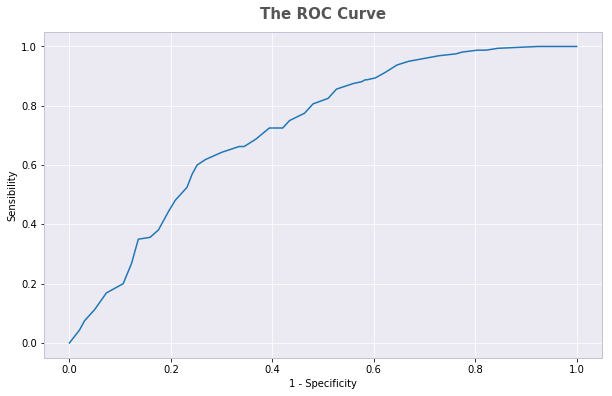

In [7]:
lr1.roc(tests=100)

## Régression logistique multiple

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


10 parameters (including the intercept)

B1:
Coeff: -6.1507208649838
OR: 0.002131944371930919
P-Value: 2.583189857915967e-06

B2:
Coeff: 0.006504017125713934
OR: 1.0065252141755061
P-Value: 0.25637418163411485

B3:
Coeff: 0.07937644573028858
OR: 1.082611789956619
P-Value: 0.0028473189738036087

B4:
Coeff: 0.1739238981114875
OR: 1.1899650037903833
P-Value: 0.0035549890474113107

B5:
Coeff: 0.018586568160066222
OR: 1.0187603735634543
P-Value: 0.5257002642861315

B6:
Coeff: 0.9253704193665981
OR: 2.5228025822365696
P-Value: 4.8961503390611246e-05

B7:
Coeff: 0.039595024977375236
OR: 1.0403893571630065
P-Value: 0.0013098057643213157

B8:
Coeff: -0.06290986927786911
OR: 0.9390281051563473
P-Value: 0.1550946367330203

B9:
Coeff: 0.00012166240142641803
OR: 1.0001216698025965
P-Value: 0.9783502315914173

B10:
Coeff: 0.04522534963462113
OR: 1.046263608466679
P-Value: 0.00019265019951372918



,y = 1,y = 0,Total
Predict 1,83,46,129
Predict 0,77,256,333
Total,160,302,462



Success rate: 73.38%
Sensibility: 51.88%
Specificity: 84.77%


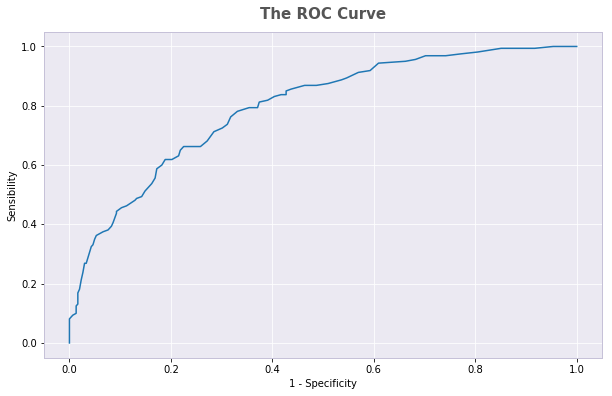

In [8]:
lr2_data = df.copy()
display(lr2_data.head())

lr2 = LogReg(lr2_data, threshold=0.5)

lr2.infos()
lr2.model.summary()
lr2.roc(tests=100)

## Algorithme de sélection

Algorithme de sélection : backward elimination. Basé sur la pvalue de chaque variable.

Index(['tobacco', 'ldl', 'famhist', 'typea', 'age', 'chd'], dtype='object')

6 parameters (including the intercept)

B1:
Coeff: -6.44644451170903
OR: 0.0015861516987343003
P-Value: 2.55283575924538e-12

B2:
Coeff: 0.08037532710560463
OR: 1.0836937309857158
P-Value: 0.0018980953447852772

B3:
Coeff: 0.16199163569651687
OR: 1.17585040611022
P-Value: 0.0032090747117468226

B4:
Coeff: 0.9081752647409611
OR: 2.4797934359219362
P-Value: 5.7516606138525565e-05

B5:
Coeff: 0.037115212880247495
OR: 1.0378125833273377
P-Value: 0.0022842908171704

B6:
Coeff: 0.05046038305966277
OR: 1.0517551952068087
P-Value: 7.647332344058795e-07



,y = 1,y = 0,Total
Predict 1,87,46,133
Predict 0,73,256,329
Total,160,302,462



Success rate: 74.24%
Sensibility: 54.37%
Specificity: 84.77%


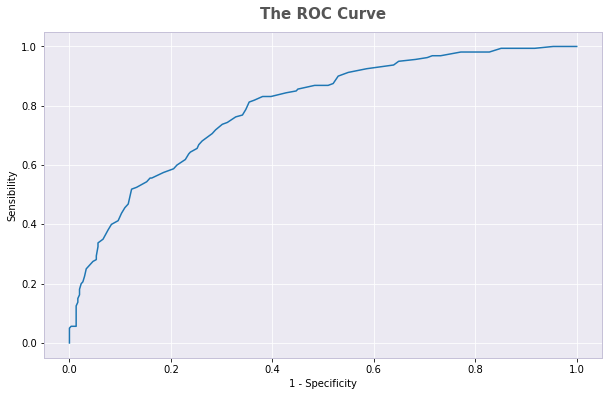

In [9]:
pvalue = 0.05
good = False

while not good:
    max_pvalue = lr2.model.pvalues.max()
    
    # If the max pvalue is still > pvalue
    if (max_pvalue > pvalue):
        
        # Variable number minus 1 (the intercept) so we get the column number
        n_col = lr2.model.pvalues.reset_index(drop=True).idxmax() - 1
        
        # We get the column name from the column number
        name_column = lr2_data.columns[n_col]
        
        # We remove this column
        lr2_data.drop(name_column, axis=1, inplace=True)
        
        # Let's do it again!
        lr2 = LogReg(lr2_data, threshold=0.5)
    
    # We're done!
    else:
        good = True

display(lr2_data.columns)
lr2.infos()
lr2.model.summary()
lr2.roc(tests=100)

## Conclusion

Celui-ci permet d'améliorer légèrement le Success Rate et permet d'améliorer nettement la sensibilité (environ 3 points de mieux).